In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### parse csv to df

In [2]:
covid = pd.read_csv('WHO-COVID-19-global-data.csv')

#### inspect df

In [3]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52320 entries, 0 to 52319
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      52320 non-null  object 
 1   Country_code       52102 non-null  object 
 2   Country            52320 non-null  object 
 3   WHO_region         48396 non-null  object 
 4   New_cases          36648 non-null  float64
 5   Cumulative_cases   52320 non-null  int64  
 6   New_deaths         24280 non-null  float64
 7   Cumulative_deaths  52320 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.2+ MB


In [4]:
covid.dtypes

Date_reported         object
Country_code          object
Country               object
WHO_region            object
New_cases            float64
Cumulative_cases       int64
New_deaths           float64
Cumulative_deaths      int64
dtype: object

In [5]:
covid["Date_reported"] = pd.to_datetime(covid["Date_reported"])

In [6]:
covid.dtypes

Date_reported        datetime64[ns]
Country_code                 object
Country                      object
WHO_region                   object
New_cases                   float64
Cumulative_cases              int64
New_deaths                  float64
Cumulative_deaths             int64
dtype: object

In [7]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52320 entries, 0 to 52319
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_reported      52320 non-null  datetime64[ns]
 1   Country_code       52102 non-null  object        
 2   Country            52320 non-null  object        
 3   WHO_region         48396 non-null  object        
 4   New_cases          36648 non-null  float64       
 5   Cumulative_cases   52320 non-null  int64         
 6   New_deaths         24280 non-null  float64       
 7   Cumulative_deaths  52320 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 3.2+ MB


In [8]:
covid.describe()

,Date_reported,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,52320,3.664800e+04,5.232000e+04,24280.000000,5.232000e+04
mean,2022-02-02 12:00:00.000000256,2.114261e+04,1.640855e+06,289.827306,1.902179e+04
min,2020-01-05 00:00:00,-6.507900e+04,0.000000e+00,-3432.000000,0.000000e+00
25%,2021-01-17 00:00:00,5.200000e+01,3.067750e+03,4.000000,2.100000e+01
50%,2022-02-02 12:00:00,4.725000e+02,3.951300e+04,21.000000,4.175000e+02
75%,2023-02-19 00:00:00,4.516500e+03,4.866835e+05,110.000000,6.346250e+03
max,2024-03-03 00:00:00,4.047548e+07,1.034368e+08,47687.000000,1.180025e+06
std,NaN,2.793896e+05,7.320649e+06,1231.298768,7.889061e+04


In [9]:
covid.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,EMRO,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,EMRO,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,EMRO,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,EMRO,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,EMRO,NaN,0,NaN,0


In [10]:
covid.tail()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
52315,2024-02-04,ZW,Zimbabwe,AFRO,31.0,266319,NaN,5737
52316,2024-02-11,ZW,Zimbabwe,AFRO,9.0,266328,NaN,5737
52317,2024-02-18,ZW,Zimbabwe,AFRO,22.0,266350,NaN,5737
52318,2024-02-25,ZW,Zimbabwe,AFRO,5.0,266355,2.0,5739
52319,2024-03-03,ZW,Zimbabwe,AFRO,3.0,266358,1.0,5740


### Cumulative cases for a country in a year

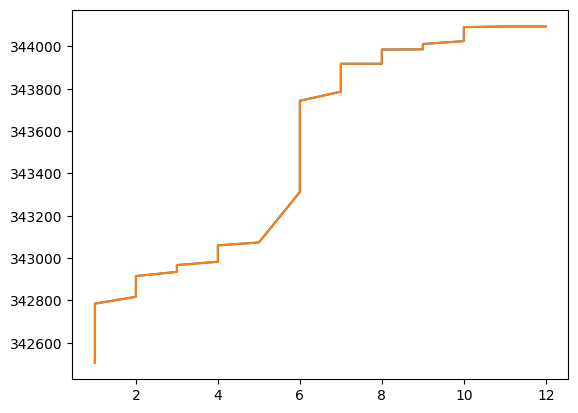

In [11]:
def annual_covid(country_name: str, for_year: int):
    # create an intermediary dataframe filtered on year and country
    per_country_per_year = covid[(covid["Country"] == country_name) & (covid["Date_reported"].dt.year == for_year)]
    plt.plot(per_country_per_year["Date_reported"].dt.month, per_country_per_year["Cumulative_cases"])
    plt.plot(per_country_per_year["Date_reported"].dt.month, per_country_per_year["Cumulative_cases"])
    plt.show()

annual_covid('Kenya', 2023)

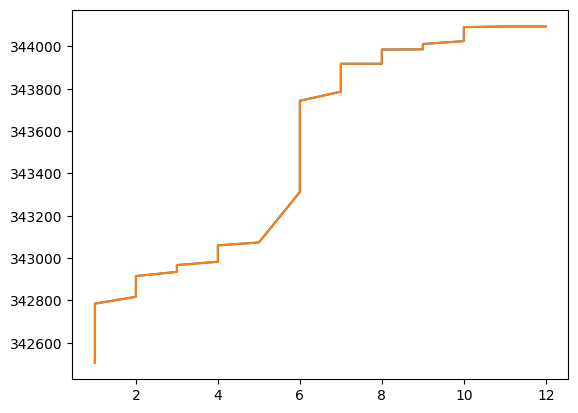

In [12]:
def annual_covid(country_name: str, for_year: int):
    # create an intermediary dataframe filtered on year and country
    per_country_per_year = covid[(covid["Country"] == country_name) & (covid["Date_reported"].dt.year == for_year)]
    plt.plot(per_country_per_year["Date_reported"].dt.month, per_country_per_year["Cumulative_cases"])
    plt.plot(per_country_per_year["Date_reported"].dt.month, per_country_per_year["Cumulative_cases"])
    plt.show()

annual_covid('Kenya', 2023)

<Axes: >

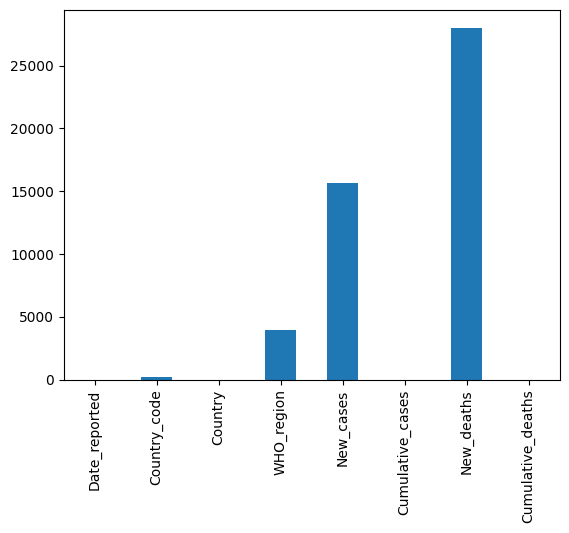

In [13]:
covid.isna().sum().plot(kind='bar')